# Linear regression:
### In this notebook, we will experiment with various regression approaches.

In [1]:
# load the necessary packages
import numpy as np
import pandas as pd
import operator
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.model_selection import train_test_split 
import pylab as pl
from sklearn import feature_selection
from sklearn import model_selection
plt.style.use('ggplot')

In [2]:
df_communities = pd.read_csv('../../data/communities/communities.csv', sep = ',', na_values = ['?'])
df_communities.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [3]:
df_communities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 100 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  1994 non-null   int64  
 1   communityname          1994 non-null   object 
 2   population             1994 non-null   float64
 3   householdsize          1994 non-null   float64
 4   racepctblack           1994 non-null   float64
 5   racePctWhite           1994 non-null   float64
 6   racePctAsian           1994 non-null   float64
 7   racePctHisp            1994 non-null   float64
 8   agePct12t21            1994 non-null   float64
 9   agePct12t29            1994 non-null   float64
 10  agePct16t24            1994 non-null   float64
 11  agePct65up             1994 non-null   float64
 12  numbUrban              1994 non-null   float64
 13  pctUrban               1994 non-null   float64
 14  medIncome              1994 non-null   float64
 15  pct

<p>The data set has a total of 100 columns of which 1 is categorical and the rest are numerical attributes. </p>

In [4]:
df_communities.shape

(1994, 100)

<p>So, we have 1994 data points with 100 columns.</p>

#### let's find out if the data set has any missing values by determining the number of missing values in each column

In [5]:
df_na_sum = df_communities.isna().sum()

# let's do a subselection an donly extract out where the values are greater than 0
print(df_na_sum[df_na_sum > 0]/len(df_communities))

OtherPerCap    0.000502
dtype: float64


<p>There is one attribute, OtherPerCap, with 0.05% missing values.</p>

### Handling missing values by imputing those values based on the variable means.

In [6]:
# Calculate the OtherPerCap mean and use it to fill in the missing values.
otherPerCap_mean = df_communities['OtherPerCap'].mean()
df_communities['OtherPerCap'].fillna(otherPerCap_mean, axis = 0, inplace = True)
df_communities.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [7]:
### Validate if the missing values within the OtherPerCap attributes have been replaced by the mean of the variable.
df_na_sum = df_communities.isna().sum()
print(df_na_sum[df_na_sum > 0]/len(df_communities))

Series([], dtype: float64)


<p>We learn that they are no any missing values.</p>

### Compute and display basic statistics for the variables in the data set.

In [8]:
np.set_printoptions(precision=2, linewidth=120, suppress=True, edgeitems=7) # setting my printing preferences. 
df_communities.describe()

,state,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
mean,28.683551,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,0.336264,...,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.237979
std,16.397553,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,0.166505,...,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.232985
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,0.250000,...,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.070000
50%,34.000000,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,0.290000,...,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.150000
75%,42.000000,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,0.360000,...,0.000000,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.330000
max,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<p>Here, we get the mean, standard deviation, min, max, 1 percentile, median and 3rd percentile for all the numerical attributes of our data set.</p>

### Separate the target attribute for regression from the rest of the attributes of the data set

In [9]:
vs_target = df_communities['ViolentCrimesPerPop']
vs_target.head() # display the first 5 records

0    0.20
1    0.67
2    0.43
3    0.12
4    0.03
Name: ViolentCrimesPerPop, dtype: float64

In [10]:
df_communities.head()

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,8,Lakewoodcity,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,53,Tukwilacity,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,24,Aberdeentown,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,34,Willingborotownship,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,42,Bethlehemtownship,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


### Let's drop the Communityname, State and ViolentCrimesPerPop from the data set. We drop state since it isn't considered predictive

In [11]:
fieldsToDrop = ['ViolentCrimesPerPop','communityname', 'state']

In [12]:
### let's drop ViolentCrimesPerPop attribute from the data set. 
df_communities.drop(columns=fieldsToDrop, inplace = True)

In [13]:
print(vs_target.shape)
df_communities.shape

(1994,)


(1994, 97)

<p>The data set now has 1994 data points with 98 attributes. </p>

In [14]:
# first five records of the data set
df_communities.head() 

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02


### let's convert the original data set and the response variable into numpy arrays since we would like to do machine learning with numpy arrays

In [15]:
# setting my printing preferences.
np.set_printoptions(precision=2, linewidth=120, suppress=True, edgeitems=7)  

#### let's extract the feature names

In [16]:
# extract the column names and convert the series of index into a numpy array
feature_names = df_communities.columns.values
print(type(feature_names))
feature_names.shape
print(feature_names[:10]) # display the first 10 records
print(len(feature_names))

<class 'numpy.ndarray'>
['population' 'householdsize' 'racepctblack' 'racePctWhite' 'racePctAsian' 'racePctHisp' 'agePct12t21' 'agePct12t29'
 'agePct16t24' 'agePct65up']
97


In [17]:
# # convert df_communities into a numpy array
# communitiesNdArray = np.array(df_communities)
# print(communitiesNdArray[0:3]) # first three records
# communitiesNdArray.shape

In [18]:
# # convert target (response) variable into a numpy array
# targetNdArray = np.array(vs_target)
# print(targetNdArray[0:5]) # the first five records
# targetNdArray.shape

### Create a 20% - 80% randomized split of the data set by using the train_test_split module from the sklearn.model_selection package.
#### Set a side 20% test portion and 80% training data partition

In [19]:
# train_test_split shuffles the data and splits it into two split for us into 80% training and 20% percent testing.
vs_trainCommunities, vs_test_communities, vs_target_train, vs_target_test = train_test_split(df_communities, vs_target, test_size = 0.2, random_state = 33)
print(vs_test_communities.shape)
vs_test_communities[0:5] # first five records

(399, 97)


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
1158,0.00,0.46,0.01,0.97,0.09,0.04,0.40,0.26,0.20,0.49,...,0.00,0.00,0.18,0.13,0.73,0.76,0.55,0.04,0.06,0.03
1079,0.01,0.35,0.01,0.96,0.04,0.04,0.32,0.45,0.29,0.62,...,0.00,0.00,0.11,0.86,0.66,0.88,0.80,0.03,0.11,0.01
1633,0.51,0.31,0.60,0.46,0.06,0.09,0.42,0.54,0.39,0.48,...,0.17,0.01,0.13,0.80,0.61,0.87,0.84,0.12,0.68,0.75
1700,0.02,0.52,0.25,0.63,0.03,0.31,0.54,0.62,0.44,0.36,...,0.01,0.00,0.13,0.72,0.35,0.50,0.70,0.13,0.04,0.01
1956,0.03,0.37,0.40,0.68,0.03,0.01,0.39,0.47,0.34,0.55,...,0.01,0.01,0.03,0.78,0.59,0.71,0.69,0.06,0.10,0.00


In [20]:
print(vs_trainCommunities.shape)
vs_trainCommunities[0:5] # the first five records

(1595, 97)


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
1184,0.01,0.54,0.02,0.91,0.27,0.04,0.37,0.41,0.25,0.28,...,0.01,0.00,0.29,0.42,0.72,0.74,0.62,0.01,0.20,0.47
401,0.99,0.42,0.59,0.44,0.11,0.11,0.44,0.56,0.37,0.39,...,0.30,0.12,0.14,0.71,0.52,0.79,0.75,0.28,0.55,0.62
1864,0.01,0.53,0.02,0.95,0.15,0.03,0.27,0.37,0.18,0.23,...,0.01,0.00,0.17,0.54,0.38,0.24,0.51,0.11,0.03,0.09
1390,0.07,0.41,0.02,0.97,0.05,0.02,0.32,0.49,0.31,0.44,...,0.00,0.00,0.13,0.88,0.76,0.74,0.84,0.05,0.27,0.40
1066,0.05,0.41,0.11,0.85,0.23,0.03,0.32,0.52,0.26,0.10,...,0.00,0.00,0.17,0.33,0.20,0.23,0.05,0.09,0.12,0.01


In [21]:
print(vs_target_train.shape)
vs_target_train[0:5] # the first five records

(1595,)


1184    0.08
401     0.40
1864    0.02
1390    0.18
1066    0.07
Name: ViolentCrimesPerPop, dtype: float64

In [22]:
print(vs_target_test.shape)
print(vs_target_test[0:5]) # the first five records

(399,)
1158    0.06
1079    0.14
1633    0.80
1700    0.50
1956    0.30
Name: ViolentCrimesPerPop, dtype: float64


#### b. Perform standard multiple linear regression on data using the implementation for Ch. 8 of MLA

In [23]:
def standRegres(xArr,yArr):
    """This function computes the best line of fit"""
    
    xMat = np.mat(xArr)            # load the x arrays and convert it into a matrice 
    yMat = np.mat(yArr).T          # load the y arrays and convert it into a matrice 
    
    xTx = xMat.T*xMat           # compute X^TX
    if np.linalg.det(xTx) == 0.0:  # determine if the Xdeterminant of (X^T) is zero.
       print("This matrix is singular, cannot do inverse")
       return
    ws = xTx.I * (xMat.T*yMat) #  If the determinate is nonzero, you compute  ws 
    return ws                  # return ws (weights)

In [24]:
# convert vs_train_communities into a numpy array
vs_train_communities = np.array(vs_trainCommunities)
vs_train_communities[:2] # first two records

array([[0.01, 0.54, 0.02, 0.91, 0.27, 0.04, 0.37, 0.41, 0.25, 0.28, 0.02, 1.  , 0.89, 0.74, 0.15, 0.83, 0.35, 0.02,
        0.4 , 0.88, 0.76, 0.75, 0.88, 0.46, 0.44, 0.47, 0.63, 0.  , 0.05, 0.06, 0.09, 0.77, 0.19, 0.63, 0.36, 0.29,
        0.22, 0.36, 0.24, 0.23, 0.53, 0.89, 0.92, 0.97, 0.81, 0.17, 0.26, 0.  , 0.04, 0.01, 0.27, 0.3 , 0.33, 0.42,
        0.18, 0.18, 0.18, 0.21, 0.82, 0.08, 0.19, 0.21, 0.59, 0.6 , 0.39, 0.86, 0.03, 0.22, 0.5 , 0.01, 0.76, 0.83,
        0.  , 0.39, 0.44, 0.01, 0.3 , 0.71, 0.71, 0.74, 0.97, 0.94, 1.  , 0.95, 0.63, 0.59, 0.89, 0.01, 0.  , 0.29,
        0.42, 0.72, 0.74, 0.62, 0.01, 0.2 , 0.47],
       [0.99, 0.42, 0.59, 0.44, 0.11, 0.11, 0.44, 0.56, 0.37, 0.39, 0.99, 1.  , 0.2 , 0.45, 0.11, 0.44, 0.48, 0.75,
        0.47, 0.21, 0.2 , 0.28, 0.18, 0.13, 0.15, 0.18, 0.22, 1.  , 0.59, 0.33, 0.49, 0.22, 0.59, 0.42, 0.51, 0.45,
        0.62, 0.69, 0.61, 0.64, 0.55, 0.18, 0.21, 0.2 , 0.16, 0.45, 0.45, 1.  , 0.98, 0.2 , 0.37, 0.37, 0.4 , 0.44,
        0.12, 0.11, 0

In [25]:
# In order to do multiple regression we need to add a column of 1s for X0
# Concatenate each row with a 1
vs_train_communities_with_ones = np.array([np.concatenate((v, [1])) for v in vs_train_communities])
vs_train_communities_with_ones[:10]

array([[0.01, 0.54, 0.02, 0.91, 0.27, 0.04, 0.37, 0.41, 0.25, 0.28, 0.02, 1.  , 0.89, 0.74, 0.15, 0.83, 0.35, 0.02,
        0.4 , 0.88, 0.76, 0.75, 0.88, 0.46, 0.44, 0.47, 0.63, 0.  , 0.05, 0.06, 0.09, 0.77, 0.19, 0.63, 0.36, 0.29,
        0.22, 0.36, 0.24, 0.23, 0.53, 0.89, 0.92, 0.97, 0.81, 0.17, 0.26, 0.  , 0.04, 0.01, 0.27, 0.3 , 0.33, 0.42,
        0.18, 0.18, 0.18, 0.21, 0.82, 0.08, 0.19, 0.21, 0.59, 0.6 , 0.39, 0.86, 0.03, 0.22, 0.5 , 0.01, 0.76, 0.83,
        0.  , 0.39, 0.44, 0.01, 0.3 , 0.71, 0.71, 0.74, 0.97, 0.94, 1.  , 0.95, 0.63, 0.59, 0.89, 0.01, 0.  , 0.29,
        0.42, 0.72, 0.74, 0.62, 0.01, 0.2 , 0.47, 1.  ],
       [0.99, 0.42, 0.59, 0.44, 0.11, 0.11, 0.44, 0.56, 0.37, 0.39, 0.99, 1.  , 0.2 , 0.45, 0.11, 0.44, 0.48, 0.75,
        0.47, 0.21, 0.2 , 0.28, 0.18, 0.13, 0.15, 0.18, 0.22, 1.  , 0.59, 0.33, 0.49, 0.22, 0.59, 0.42, 0.51, 0.45,
        0.62, 0.69, 0.61, 0.64, 0.55, 0.18, 0.21, 0.2 , 0.16, 0.45, 0.45, 1.  , 0.98, 0.2 , 0.37, 0.37, 0.4 , 0.44,
        0.12, 0

In [26]:
# convert vs_target_train into a numpy array
vs_target_train = np.array(vs_target_train)

In [27]:
# print the first 5 elements of the train response variable
print(vs_target_train[:10])

[0.08 0.4  0.02 0.18 0.07 0.33 0.56 0.15 0.22 0.76]


#### create a linear regression object

In [28]:
# just call a standRegres object just like the classifier. 
ws = standRegres(vs_train_communities_with_ones, vs_target_train)
ws[:10] # return the first 10 weights

matrix([[-0.01],
        [-0.05],
        [ 0.22],
        [-0.05],
        [-0.02],
        [ 0.05],
        [ 0.1 ],
        [-0.17],
        [-0.13],
        [ 0.07]])

### Compute the RMSE values on the full training data

#### let's compute yHat with the derived weights ws

In [29]:
xMat = vs_train_communities_with_ones  # vs_train_communities_with_ones is a numpy array
yMat = vs_target_train               # vs_target_train is already a numpy array

In [30]:
yHat = xMat * ws
yHat[:5] # first five records of yHat

matrix([[-0.03],
        [ 0.63],
        [-0.07],
        [ 0.12],
        [ 0.07]])

In [31]:
print(yHat.shape)
print(yMat.shape)

(1595, 1)
(1595,)


##### Now we construct a vector of errors

In [32]:
#  you take the absolute value of the difference between yHat and the actual y values and the result will be your error  and that is the term you are going to square
# we transpose yHat to make sure it is in the same shape as yHat
# predictions - expectations
err = abs(yHat.ravel() - yMat.ravel()) 

In [33]:
# let's see the error on the first 5 predictions
err[:5]

matrix([[0.11, 0.23, 0.09, 0.06, 0.  , 0.11, 0.14, ..., 0.05, 0.04, 0.04, 0.1 , 0.13, 0.04, 0.17]])

##### Perform a dot product of the error vector with itself, which gives us the sum of squared errors

In [34]:
totalError = np.square(err)

##### Compute RMSE

In [35]:
# compute the square root of the total error and divide that by the length of yHat (number of points), 
# which gives you the average RMSE.  
rmseTrain = np.sqrt(totalError.sum()/len(yHat))
round(rmseTrain,2)

0.13

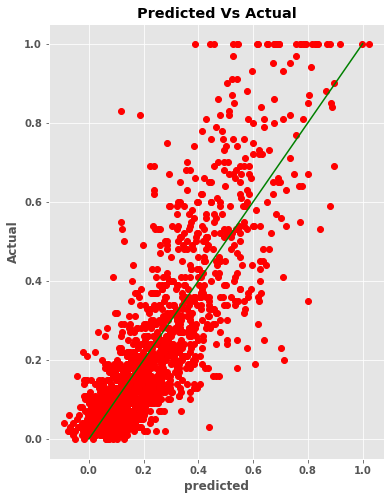

In [36]:
pl.figure(figsize = (6, 8))
pl.plot(yHat, yMat, 'ro')
pl.plot([0,1.0],[0,1.0], 'g-')
pl.xlabel('predicted')
pl.ylabel('Actual')
pl.title('Predicted Vs Actual')
pl.show()

<p>Between 0.0 and 0.4, there are alot of points clustered around the line, but as the line increases most points are off. <p>

# Why is my result different from? I expected to get a single value

### plot the correlation between the predicted and actual values of the target attribute

In [37]:
yHat.shape

(1595, 1)

In [38]:
yMat.shape

(1595,)

#### we need to transpose yHat so that both of the vectors are showing as row vectors

In [39]:
np.corrcoef(yHat.T, yMat)

array([[1.  , 0.84],
       [0.84, 1.  ]])

<p>This gives us the correlation between all possible pairs.</p>
<p>Since the correlation between yMat and yMat is perfect, the elements on the diagonal are showing up as 1.0.</p>
<p>The correlation between the predicted values, yHat, and the actual values, yMat, is 0.84. </p>

### Display the obtained regression coefficients (weights) and plot them using matplotlib

In [40]:
# %matplotlib inline
# # you give it a model, features, and the feature names
# def plot_coefficients(model, n_features, feature_names):
#     """Diaplays the regression coefficients of the different features in our data set"""
#     pl.barh(range(n_features), model[1:], align='center')# plot the barplot of the coeficients except 1 which is not meaningful to us.
#     pl.yticks(np.arange(n_features), feature_names)
#     pl.xlabel("Coefficient Value")
#     pl.ylabel("Feature")
#     pl.ylim(-1, n_features)

# plot_coefficients(ws, len(feature_names), feature_names) # plots order the features
# # the coefficients that we find might not be important because we didn't normalize the data, which we need to. 

In [41]:
vs_train_communities_with_ones.shape

(1595, 98)

In [42]:
len(ws)

98

In [43]:
feature_names

array(['population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21',
       'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf',
       'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade',
       'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'MalePctDivorce',
       'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par',
       'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent',
       'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8',
       'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'Pc

### Using scikit-learn

In [44]:
# just call a linear regression object just like the classifier. 
linreg = LinearRegression() 

 
# Train the model using the training sets
linreg.fit(vs_train_communities_with_ones, vs_target_train)

LinearRegression()

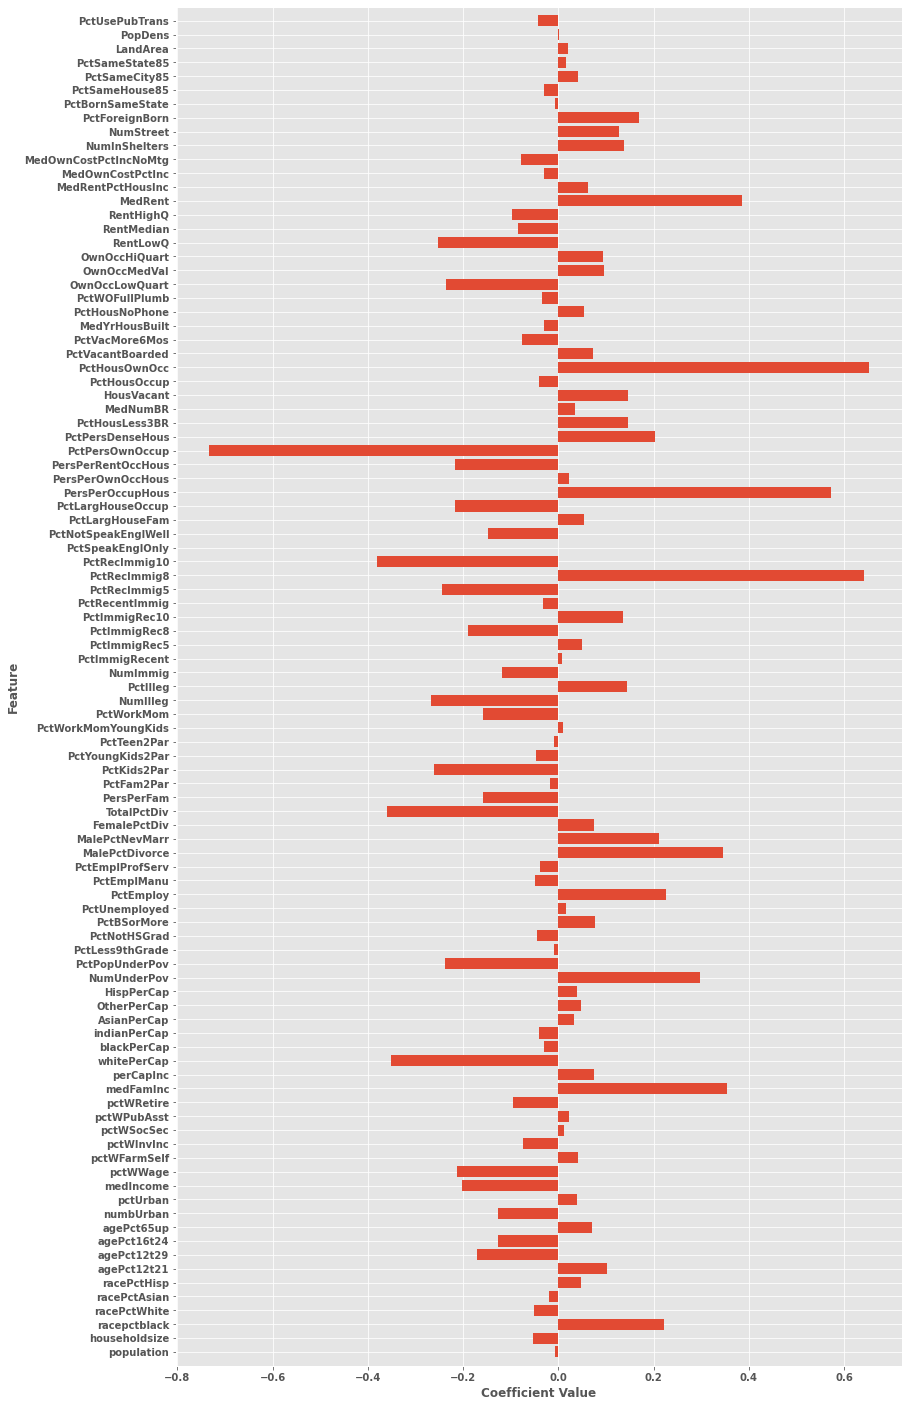

In [45]:
%matplotlib inline
# you give it a model, features, and the feature names
def plot_coefficients(model, n_features, feature_names):
    """Diaplays the regression coefficients of the different features in our data set"""
    plt.rcParams["figure.figsize"] = (13,25)
    pl.barh(range(n_features), model.coef_[:-1], align='center')# plot the barplot of the coeficients except 1 which is not meaningful to us.
    pl.yticks(np.arange(n_features), feature_names)
    pl.xlabel("Coefficient Value")
    pl.ylabel("Feature")
    pl.ylim(-1, n_features)

plot_coefficients(linreg, len(feature_names), feature_names) # plots order the features
# the coefficients that we find might not be important because we didn't normalize the data, which we need to. 

### Finally, perform 10-fold cross-validation on the training partition and compare the cross-validation RMSE to the training RMSE (for cross validation, you should use the KFold module from sklearn.model_selection). Note if you cannot get the book's version working, use scikit-learn Linear Regression instead for a 3pt deduction).

In [46]:
# Now let's compute RMSE using 10-fold x-validation
n = 10


kf = KFold(n_splits=n)
kf.get_n_splits(vs_train_communities_with_ones)

#print(kf)  
#KFold(n_splits=n,random_state=None, shuffle=False)
 

xval_err = 0

# here are doing multiple train, test splits. 
for train, test in kf.split(vs_train_communities_with_ones):
    
    linreg.fit(vs_train_communities_with_ones[train],vs_target_train[train])    # build a linear regression model
    
    p = linreg.predict(vs_train_communities_with_ones[test])   # predict on the test set. 
    
    e = p-vs_target_train[test]                                 # look at the test error
    
    xval_err += np.sqrt(np.dot(e,e)/len(vs_train_communities_with_ones[test]))   # look at the cross validation error for each of the folds
       
rmse_10cv = xval_err/n            # then you get the average RMSE cross validation score by diving by 10

# we print the same way we did it earlier. 
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmseTrain)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression
RMSE on training: 0.1262
RMSE on 10-fold CV: 0.1343


##### There is a little bit of error in the RMSE on 10-fold Cross Validation which we expected and this implies that we have a better estimate of how well we are going to do because it does it several times.

## c. Feature Selection

### use the scikit-learn regression model from sklearn.linear_model with a subset of features to perform linear regression.

In [47]:
# initializing a linear regression model
linreg = LinearRegression() 

 
# Train the model using the training sets
linreg.fit(vs_train_communities_with_ones, vs_target_train)

LinearRegression()

In [48]:
feature_selection.SelectPercentile?

##### selecting the top 25 % of the most important features as my baseline

In [49]:
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile = 25)

In [50]:
# lets fit the data and carry out a transformation
x_train_fs = fs.fit_transform(vs_train_communities_with_ones, vs_target_train)

C:\Users\rejalu1\.conda\envs\cmdpy37\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
C:\Users\rejalu1\.conda\envs\cmdpy37\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


In [51]:
np.set_printoptions(suppress=True, precision=2, linewidth=80)
print(fs.get_support())
print(fs.scores_)

[False False  True  True False False False False False False False False  True
 False False  True False  True False  True False False False False False False
 False  True  True False  True False  True False False False  True False  True
  True False  True  True  True  True False False  True  True False False False
 False False False False False False False False False False False False False
  True  True  True False False False  True  True False False  True False False
 False False False False False False False False False False False False False
 False False False False False False False]
[ 256.03    3.49 1074.89 1412.51    1.96  137.54    4.89   37.33   15.88
    8.25  247.78   11.06  341.63  161.57   40.34  756.01   22.49  784.57
   13.98  366.9   214.99   65.45  126.58   12.32   29.07   33.37   92.37
  400.31  578.82  319.22  472.2   173.37  533.91  190.47    2.61    7.4
  602.77  161.08  704.77  693.14   24.47 1657.87 1972.8  1342.17 1299.54
    1.31   36.5   431.64 1936.12  151.6

<p>We scored them all, but we only considered <strong>25% </strong> of the features. </p> 
<p>The true values are the ones that were actually used and the features which weren't used turned out to be false. </p>

In [52]:
vs_trainCommunities.columns.values

array(['population', 'householdsize', 'racepctblack', 'racePctWhite',
       'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29',
       'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome',
       'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst',
       'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap',
       'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad',
       'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu',
       'PctEmplProfServ', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv',
       'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par',
       'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom',
       'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5',
       'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5',
       'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEn

In [53]:
# getting the column values we had support for
vs_trainCommunities.columns[fs.get_support()[:-1]].values

array(['racepctblack', 'racePctWhite', 'medIncome', 'pctWInvInc',
       'pctWPubAsst', 'medFamInc', 'NumUnderPov', 'PctPopUnderPov',
       'PctNotHSGrad', 'PctUnemployed', 'MalePctDivorce', 'FemalePctDiv',
       'TotalPctDiv', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par',
       'PctTeen2Par', 'NumIlleg', 'PctIlleg', 'PctPersOwnOccup',
       'PctPersDenseHous', 'PctHousLess3BR', 'PctHousOwnOcc',
       'PctVacantBoarded', 'PctHousNoPhone'], dtype=object)

<p><strong>These are features that were actually selected.</strong></p>

In [54]:
# vs_trainCommunities.shape

In [55]:
# fs.get_support()[:-1].shape

#### Now we get the support of value of the different scores for the supported features:

In [56]:
for i in range(len(vs_trainCommunities.columns.values)):
    if fs.get_support()[i]:
        print (vs_trainCommunities.columns.values[i],'\t', fs.scores_[i])

racepctblack 	 1074.8895092675157
racePctWhite 	 1412.5078123926207
medIncome 	 341.63253752319906
pctWInvInc 	 756.0149723312611
pctWPubAsst 	 784.570640809257
medFamInc 	 366.9004218440579
NumUnderPov 	 400.3078568907942
PctPopUnderPov 	 578.8173652137629
PctNotHSGrad 	 472.1962078690577
PctUnemployed 	 533.9131521991943
MalePctDivorce 	 602.7748935815906
FemalePctDiv 	 704.7727390048145
TotalPctDiv 	 693.1378303821915
PctFam2Par 	 1657.8650169982222
PctKids2Par 	 1972.804063866535
PctYoungKids2Par 	 1342.1736137875996
PctTeen2Par 	 1299.5351058427048
NumIlleg 	 431.63556026913983
PctIlleg 	 1936.1208737826828
PctPersOwnOccup 	 630.760339373974
PctPersDenseHous 	 375.6459018761192
PctHousLess3BR 	 487.96168084238747
PctHousOwnOcc 	 478.5304297184818
PctVacantBoarded 	 507.63640854199133
PctHousNoPhone 	 505.86265274687827


<p>This gives us the support of the value of the different scores. You can see the value of these fatures. </p>

In [57]:
x_train_fs

array([[0.02, 0.91, 0.89, 0.83, 0.02, 0.88, 0.  , ..., 0.04, 0.86, 0.03, 0.22,
        0.83, 0.  , 0.01],
       [0.59, 0.44, 0.2 , 0.44, 0.75, 0.21, 1.  , ..., 0.98, 0.31, 0.2 , 0.62,
        0.31, 0.86, 0.33],
       [0.02, 0.95, 0.82, 0.75, 0.05, 0.77, 0.  , ..., 0.06, 0.88, 0.03, 0.37,
        0.86, 0.04, 0.02],
       [0.02, 0.97, 0.49, 0.52, 0.24, 0.51, 0.02, ..., 0.12, 0.67, 0.06, 0.53,
        0.59, 0.19, 0.04],
       [0.11, 0.85, 0.57, 0.68, 0.04, 0.58, 0.01, ..., 0.06, 0.66, 0.05, 0.37,
        0.61, 0.01, 0.05],
       [0.17, 0.41, 0.43, 0.38, 0.45, 0.41, 0.01, ..., 0.29, 0.66, 0.67, 0.55,
        0.64, 0.2 , 0.11],
       [1.  , 0.15, 0.17, 0.24, 0.77, 0.18, 0.19, ..., 0.86, 0.31, 0.34, 0.52,
        0.34, 0.45, 0.7 ],
       ...,
       [0.01, 0.95, 0.17, 0.41, 0.53, 0.2 , 0.02, ..., 0.14, 0.46, 0.16, 0.6 ,
        0.47, 0.21, 0.4 ],
       [0.02, 0.86, 0.43, 0.52, 0.23, 0.43, 0.02, ..., 0.13, 0.4 , 0.18, 0.62,
        0.37, 0.09, 0.11],
       [0.02, 0.57, 0.59, 0.7 , 0.

<p><strong>x_train_fs contains 25% of the features we ranked.</strong></p>

### Feature Selection: Finding the best percentile with cross-validation. 

##### Since we can't just randomly do 25%, we are going to try and see what would be the right percentile of features that we need and this is what this function will be doing. It is varying how many right percentile of features do we need.

1 -0.11287401163402822
6 -0.09943268475677308
11 -0.09900510519125442
16 -0.09909059079526811


C:\Users\rejalu1\.conda\envs\cmdpy37\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
C:\Users\rejalu1\.conda\envs\cmdpy37\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
C:\Users\rejalu1\.conda\envs\cmdpy37\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
C:\Users\rejalu1\.conda\envs\cmdpy37\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
C:\Users\rejalu1\.conda\envs\cmdpy37\lib\site-packages\sklearn\feature_selection\_univariate_selec

21 -0.0975068622131086
26 -0.09534915043594905
31 -0.09492194643289374
36 -0.09474955355002232
41 -0.09435370428857698
46 -0.09466441760571029


C:\Users\rejalu1\.conda\envs\cmdpy37\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
C:\Users\rejalu1\.conda\envs\cmdpy37\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
C:\Users\rejalu1\.conda\envs\cmdpy37\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
C:\Users\rejalu1\.conda\envs\cmdpy37\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
C:\Users\rejalu1\.conda\envs\cmdpy37\lib\site-packages\sklearn\feature_selection\_univariate_selec

51 -0.09505109356109845
56 -0.0954257382389749
61 -0.0957448325477276
66 -0.09563045814358938
71 -0.09583132229767208


C:\Users\rejalu1\.conda\envs\cmdpy37\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
C:\Users\rejalu1\.conda\envs\cmdpy37\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
C:\Users\rejalu1\.conda\envs\cmdpy37\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
C:\Users\rejalu1\.conda\envs\cmdpy37\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
C:\Users\rejalu1\.conda\envs\cmdpy37\lib\site-packages\sklearn\feature_selection\_univariate_selec

76 -0.0951684772344874
81 -0.09548089347790066
86 -0.09516368543611167
91 -0.0953146310011092


C:\Users\rejalu1\.conda\envs\cmdpy37\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
C:\Users\rejalu1\.conda\envs\cmdpy37\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
C:\Users\rejalu1\.conda\envs\cmdpy37\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
C:\Users\rejalu1\.conda\envs\cmdpy37\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom
C:\Users\rejalu1\.conda\envs\cmdpy37\lib\site-packages\sklearn\feature_selection\_univariate_selec

96 -0.09533345047381278
Optimal percentile of features:41 

Optimal number of features:39 



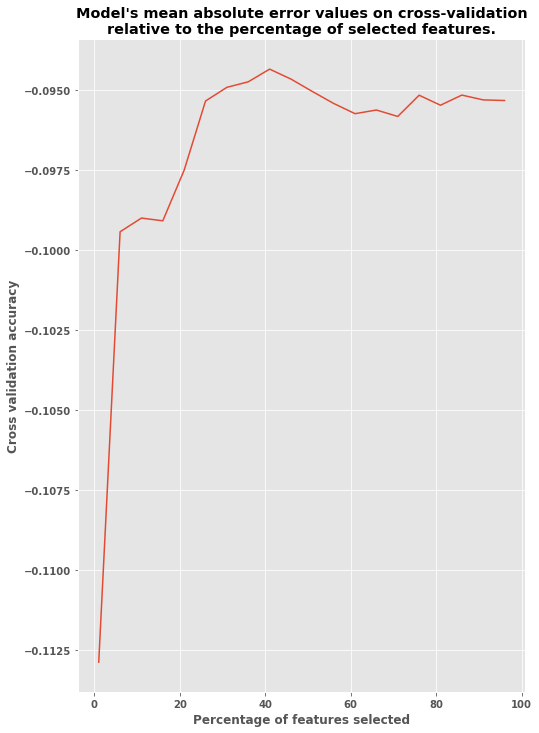

In [58]:
percentiles = range(1, 100, 5)
results = []

for num in range(1, 100, 5):
    fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=num)
    
    x_train_fs = fs.fit_transform(vs_train_communities_with_ones, vs_target_train)     # fit the data so that it is transformed with new ranked features
    
    # here we use the cross validation score so that is going to be a better estimate of what the regression model does.
    # because it going to split the data set five times having set the cross validation k = 5
    scores = model_selection.cross_val_score(linreg, x_train_fs, vs_target_train, cv = 5, scoring = 'neg_mean_absolute_error')
    
    print(num, scores.mean())
    results = np.append(results, scores.mean())
    
optimal_percentile = np.where(results == results.max())[0]
# print('optimal_percentile[0]: %s' %optimal_percentile)
print ("Optimal percentile of features:{0}".format(percentiles[optimal_percentile[0]]), "\n")
optimal_num_features = int(percentiles[optimal_percentile[0]]*len(vs_trainCommunities.columns)/100)
print ("Optimal number of features:{0}".format(optimal_num_features), "\n")

pl.figure(figsize = (8, 12))
pl.xlabel('Percentage of features selected')
pl.ylabel('Cross validation accuracy')
pl.title("Model's mean absolute error values on cross-validation\nrelative to the percentage of selected features.")
pl.plot(percentiles,results);

<p>Since the highest accuracy is about 0.65, so the optimal number of features selected will be 76%.</p>

In [59]:
vs_train_communities_with_ones

array([[0.01, 0.54, 0.02, 0.91, 0.27, 0.04, 0.37, ..., 0.72, 0.74, 0.62, 0.01,
        0.2 , 0.47, 1.  ],
       [0.99, 0.42, 0.59, 0.44, 0.11, 0.11, 0.44, ..., 0.52, 0.79, 0.75, 0.28,
        0.55, 0.62, 1.  ],
       [0.01, 0.53, 0.02, 0.95, 0.15, 0.03, 0.27, ..., 0.38, 0.24, 0.51, 0.11,
        0.03, 0.09, 1.  ],
       [0.07, 0.41, 0.02, 0.97, 0.05, 0.02, 0.32, ..., 0.76, 0.74, 0.84, 0.05,
        0.27, 0.4 , 1.  ],
       [0.05, 0.41, 0.11, 0.85, 0.23, 0.03, 0.32, ..., 0.2 , 0.23, 0.05, 0.09,
        0.12, 0.01, 1.  ],
       [0.02, 0.71, 0.17, 0.41, 0.72, 0.64, 0.41, ..., 0.55, 0.84, 0.75, 0.02,
        0.24, 0.18, 1.  ],
       [0.11, 0.52, 1.  , 0.15, 0.02, 0.01, 0.58, ..., 0.5 , 0.69, 0.71, 0.16,
        0.12, 0.1 , 1.  ],
       ...,
       [0.  , 0.34, 0.01, 0.95, 0.06, 0.06, 0.4 , ..., 0.42, 0.56, 0.64, 0.01,
        0.17, 0.05, 1.  ],
       [0.04, 0.52, 0.02, 0.86, 0.29, 0.32, 0.37, ..., 0.71, 0.7 , 0.72, 0.02,
        0.32, 0.56, 1.  ],
       [0.06, 0.43, 0.02, 0.57, 1.

In [60]:
# #def optimalAlphaIdentification(vs_train_communities_with_ones, vs_target_train):
# print('%s' %('Ridge Regression'))
# print('alpha\t RMSE_train\t RMSE_10cv\n')

# # 20 increments between 0.01 and 20 and we taking 50 steps in between.
# alpha = np.linspace(.01, 20, 50)  

# # declare training and cv rmse arrays because we are going to collect them over multiple tries of alpha. 
# t_rmse = np.array([])    
# cv_rmse = np.array([])

# n = 5
# # tune for multiple values of the alpha parameter. 
# for a in alpha:     # for a in alpha, repeat all the steps we have done
#     modelType = Ridge(alpha=a)
    
#     # computing the RMSE on training data
#     modelType.fit(vs_train_communities_with_ones, vs_target_train)
    
#     p = modelType.predict(vs_train_communities_with_ones)
    
#     err = p - vs_target_train
    
#     total_error = np.dot(err,err)
    
#     rmse_train = np.sqrt(total_error/len(p))
# #     print(rmse_train)

#     kf = KFold(n_splits = 5)
#     kf.get_n_splits(vs_train_communities_with_ones)
 
#     KFold(n_splits = n, random_state = None, shuffle = False)

#     xval_err = 0
    
    
#     # we derive the cross validation error for every fold. 
#     for train, test in kf.split(vs_train_communities_with_ones):
        
#         modelType.fit(vs_train_communities_with_ones[train], vs_target_train[train])
        
#         p = modelType.predict(vs_train_communities_with_ones[test])
        
#         err = p - vs_target_train[test]
        
# #         print(np.sqrt(np.dot(err,err)/len(vs_train_communities_with_ones[test])))
#     xval_err += np.sqrt(np.dot(err,err)/len(vs_train_communities_with_ones[test]))
        

#     rmse_10cv = xval_err/n
    
#     t_rmse = np.append(t_rmse, [rmse_train])
#     cv_rmse = np.append(cv_rmse, [rmse_10cv])
#     print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv))


In [61]:
def optimalAlphaIdentification(vs_train_communities_with_ones, vs_target_train, model):
    """This function tunes for alpha"""
    print('%s regression' %(model))
    print('alpha\t RMSE_train\t RMSE_10cv\n')

    # 20 increments between 0.01 and 20 and we taking 50 steps in between.
    alpha = np.linspace(.01, 20, 50)  

    # declare training and cv rmse arrays because we are going to collect them over multiple tries of alpha. 
    t_rmse = np.array([])    
    cv_rmse = np.array([])
    
    model_type = ['Lasso', 'Ridge']

    n = 5
    # tune for multiple values of the alpha parameter. 
    for a in alpha:     # for a in alpha, repeat all the steps we have done

        if model_type[0] == model:
            modelType = Lasso(alpha=a)
            
        elif model_type[1] == model:
            modelType = Ridge(alpha=a)
    
        # computing the RMSE on training data
        modelType.fit(vs_train_communities_with_ones, vs_target_train)
    
        p = modelType.predict(vs_train_communities_with_ones)
    
        err = p - vs_target_train
    
        total_error = np.dot(err,err)
    
        rmse_train = np.sqrt(total_error/len(p))
    #     print(rmse_train)

        kf = KFold(n_splits = 5)
        kf.get_n_splits(vs_train_communities_with_ones)
 
        KFold(n_splits = n, random_state = None, shuffle = False)

        xval_err = 0
    
    
        # we derive the cross validation error for every fold. 
        for train, test in kf.split(vs_train_communities_with_ones):
        
            modelType.fit(vs_train_communities_with_ones[train], vs_target_train[train])
        
            p = modelType.predict(vs_train_communities_with_ones[test])
        
            err = p - vs_target_train[test]
        
        #         print(np.sqrt(np.dot(err,err)/len(vs_train_communities_with_ones[test])))
        xval_err += np.sqrt(np.dot(err,err)/len(vs_train_communities_with_ones[test]))
        

        rmse_10cv = xval_err/n
    
        t_rmse = np.append(t_rmse, [rmse_train])
        cv_rmse = np.append(cv_rmse, [rmse_10cv])
        print('{:.3f}\t {:.4f}\t\t {:.4f}'.format(a,rmse_train,rmse_10cv))
    return alpha,t_rmse, cv_rmse

In [62]:
alpha, t_rmse, cv_rmse = optimalAlphaIdentification(vs_train_communities_with_ones, vs_target_train, 'Ridge')

Ridge regression
alpha	 RMSE_train	 RMSE_10cv

0.010	 0.1262		 0.0286
0.418	 0.1268		 0.0282
0.826	 0.1273		 0.0282
1.234	 0.1276		 0.0281
1.642	 0.1279		 0.0281
2.050	 0.1281		 0.0281
2.458	 0.1284		 0.0281
2.866	 0.1286		 0.0281
3.274	 0.1288		 0.0281
3.682	 0.1289		 0.0281
4.090	 0.1291		 0.0281
4.498	 0.1292		 0.0281
4.906	 0.1294		 0.0281
5.313	 0.1295		 0.0281
5.721	 0.1296		 0.0281
6.129	 0.1297		 0.0281
6.537	 0.1298		 0.0281
6.945	 0.1299		 0.0281
7.353	 0.1300		 0.0281
7.761	 0.1301		 0.0281
8.169	 0.1302		 0.0281
8.577	 0.1303		 0.0281
8.985	 0.1304		 0.0281
9.393	 0.1305		 0.0281
9.801	 0.1306		 0.0281
10.209	 0.1306		 0.0281
10.617	 0.1307		 0.0281
11.025	 0.1308		 0.0281
11.433	 0.1308		 0.0281
11.841	 0.1309		 0.0281
12.249	 0.1310		 0.0281
12.657	 0.1310		 0.0281
13.065	 0.1311		 0.0282
13.473	 0.1312		 0.0282
13.881	 0.1312		 0.0282
14.289	 0.1313		 0.0282
14.697	 0.1313		 0.0282
15.104	 0.1314		 0.0282
15.512	 0.1314		 0.0282
15.920	 0.1315		 0.0282
16.328	 0.1315		 0

In [63]:
alphaL, t_rmseL, cv_rmseL = optimalAlphaIdentification(vs_train_communities_with_ones, vs_target_train, 'Lasso')

Lasso regression
alpha	 RMSE_train	 RMSE_10cv

0.010	 0.1520		 0.0321
0.418	 0.2312		 0.0490
0.826	 0.2312		 0.0490
1.234	 0.2312		 0.0490
1.642	 0.2312		 0.0490
2.050	 0.2312		 0.0490
2.458	 0.2312		 0.0490
2.866	 0.2312		 0.0490
3.274	 0.2312		 0.0490
3.682	 0.2312		 0.0490
4.090	 0.2312		 0.0490
4.498	 0.2312		 0.0490
4.906	 0.2312		 0.0490
5.313	 0.2312		 0.0490
5.721	 0.2312		 0.0490
6.129	 0.2312		 0.0490
6.537	 0.2312		 0.0490
6.945	 0.2312		 0.0490
7.353	 0.2312		 0.0490
7.761	 0.2312		 0.0490
8.169	 0.2312		 0.0490
8.577	 0.2312		 0.0490
8.985	 0.2312		 0.0490
9.393	 0.2312		 0.0490
9.801	 0.2312		 0.0490
10.209	 0.2312		 0.0490
10.617	 0.2312		 0.0490
11.025	 0.2312		 0.0490
11.433	 0.2312		 0.0490
11.841	 0.2312		 0.0490
12.249	 0.2312		 0.0490
12.657	 0.2312		 0.0490
13.065	 0.2312		 0.0490
13.473	 0.2312		 0.0490
13.881	 0.2312		 0.0490
14.289	 0.2312		 0.0490
14.697	 0.2312		 0.0490
15.104	 0.2312		 0.0490
15.512	 0.2312		 0.0490
15.920	 0.2312		 0.0490
16.328	 0.2312		 0

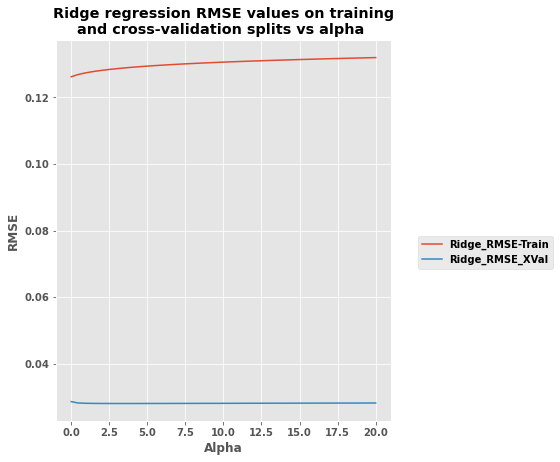

In [64]:
pl.figure(figsize = (6, 7))
pl.plot(alpha, t_rmse, label ='Ridge_RMSE-Train')
pl.plot(alpha, cv_rmse, label ='Ridge_RMSE_XVal')

pl.legend(('Ridge_RMSE-Train', 'Ridge_RMSE_XVal'), bbox_to_anchor=(1.5, 0.5))
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.title('Ridge regression RMSE values on training\nand cross-validation splits vs alpha ')
pl.show()

<p>The RMSE for training is going up and the one for cross validation is decreasing from left to right. My best alpha will be 7.5</p>

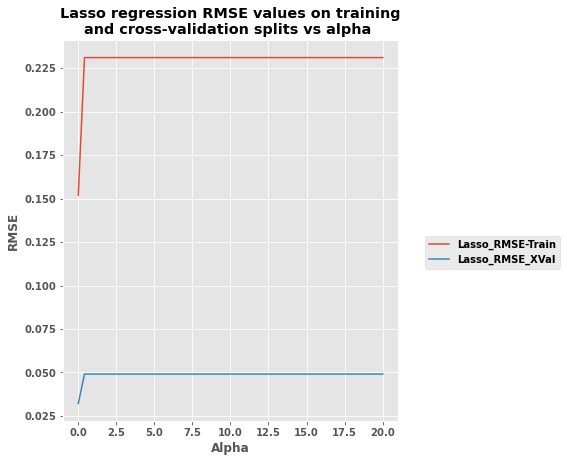

In [65]:
pl.figure(figsize = (6, 7))

pl.plot(alphaL, t_rmseL, label ='Lasso_RMSE-Train')
pl.plot(alphaL, cv_rmseL, label ='Lasso_RMSE_XVal')

pl.legend(('Lasso_RMSE-Train', 'Lasso_RMSE_XVal'), bbox_to_anchor=(1.5, 0.5))
pl.ylabel('RMSE')
pl.xlabel('Alpha')
pl.title('Lasso regression RMSE values on training\nand cross-validation splits vs alpha ')
pl.show()

<p>Both the RMSE training and cross-validation are increase from left to right then suddenly just become constant. So, the best aplha will be 0.01.</p>

### Training the model on the full training data and evaluating it on the set-aside test data.

#### A versatile function to measure performance of a model:

In [66]:
from sklearn import metrics

def measure_performance(X, y, modelType):
    y_pred = modelType.predict(X)   
    mae = metrics.mean_absolute_error(y, y_pred)
    
    r2Value = metrics.r2_score(y, y_pred)
    return mae, r2Value

In [67]:
from sklearn import metrics

def measurePerformance(X, y, modelType):
    y_pred = modelType.predict(X)   
    mae = metrics.mean_absolute_error(y, y_pred)
    
    
    return mae, 

#### using ridge regression:

In [68]:
# Using alpha  = 7.5
# create a linear regression object with a ridge regression  coefficient 7.5
ridge = Ridge(fit_intercept = True, alpha = 7.5)
ridge.fit(vs_train_communities_with_ones, vs_target_train)

Ridge(alpha=7.5)

In [69]:
# convert the test data set into a numpy array  and add a column with 1 value to each row of the array
vs_testcommunities = np.array(vs_test_communities)
vs_test_communities_with_ones = np.array([np.concatenate((v, [1])) for v in vs_testcommunities])
vs_test_communities_with_ones.shape

(399, 98)

In [70]:
# convert the vs_target_test into a numpy array
vs_targetTest = np.array(vs_target_test)
vs_targetTest.shape

(399,)

#### Evaluating the model on the set-aside test data. 

In [71]:
yHat = ridge.predict(vs_test_communities_with_ones)
error = yHat - vs_targetTest
total_error = np.dot(error, error)
rmse_test = np.sqrt(total_error/len(yHat))
print('RMSE on the training data set: %.4f' %rmseTrain)
print('RMSE on the testing data set: %.4f' %rmse_test)

RMSE on the training data set: 0.1262
RMSE on the testing data set: 0.1451


In [72]:
# measuring the performance of a model on the testing set
model_MAE, RSquared =  measure_performance(vs_test_communities_with_ones, vs_targetTest, ridge)
print('The Mean Absolute Error for the testing set is: %.4f' %model_MAE)
print('The coefficient of determination on testing is: %.4f' %RSquared)

The Mean Absolute Error for the testing set is: 0.1013
The coefficient of determination on testing is: 0.6329


In [73]:
# measuring the performance of a model on the training set
model_MAE, RSquared =  measure_performance(vs_train_communities_with_ones, vs_target_train, ridge)
print('The Mean Absolute Error for the training set is: %.4f' %model_MAE)
print('The coefficient of determination on the training set is: %.4f' %RSquared)

The Mean Absolute Error for the training set is: 0.0904
The coefficient of determination on the training set is: 0.6834


<p>Looking at the Mean Absolute Error (MAE) for both training and testing, the MAE for testing is greater than one for training. This means that it added bias into our estimations, giving us a better estimate with the set-aside test data and the variation in error is about 0.1 units. Ideally the MAE should be equal to zero, which is never the case.</p>
<p>Also, based on the coefficient of determination we can interprete that 63% of the model predictions are correct. To improve on this model we need to look treat outliers, carryout feature engineering. We also need to get more data since our model over fits on training data set with the coefficient of determination of 68%.</p>

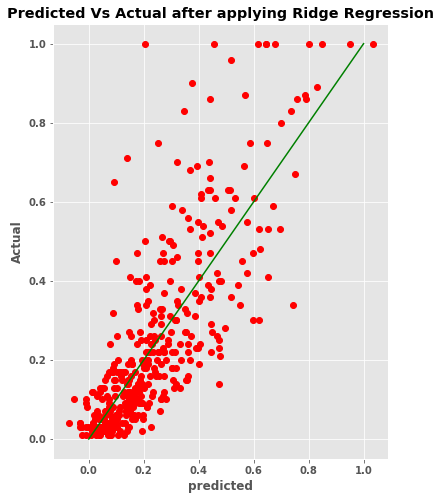

In [74]:
pl.figure(figsize = (6, 8))
pl.plot(yHat, vs_targetTest, 'ro')
pl.plot([0,1.0],[0,1.0], 'g-')
pl.xlabel('predicted')
pl.ylabel('Actual')
pl.title('Predicted Vs Actual after applying Ridge Regression')
pl.show()

<p>After applying ridge regression, which deals with the problem of having more features than data points, we use a lambda value or aplha that imposes a maximum value on the sum of all our weights and this decreases the un important features.</p>
<p>We can easily understand our data since most of the features will be decreased as it is defined in the chat above with less points between 0.4 and 1; most points are clustered around the line between 0.0 and 0.4.</p>
<p>Since the model is experiencing too much bias, such as underfitting, we might need to add polynomial terms and perform an outlier analysis.</p>

#### using Lasso regression:

In [75]:
# Using the alpha of 5.0 for Lasso
lasso = Lasso(fit_intercept = True, alpha = 5)
lasso.fit(vs_train_communities_with_ones, vs_target_train)

Lasso(alpha=5)

#### Evaluating the Lasso model on the set-aside test data. 

In [76]:
yHat = lasso.predict(vs_test_communities_with_ones)
error = yHat - vs_targetTest
total_error = np.dot(error, error)
rmse_test = np.sqrt(total_error/len(yHat))
print('RMSE on the training data set: %.4f' %rmseTrain)
print('RMSE on the testing data set: %.4f' %rmse_test)

RMSE on the training data set: 0.1262
RMSE on the testing data set: 0.2399


In [77]:
# measuring the performance of a model on the testing set
model_MAE, RSquared =  measure_performance(vs_test_communities_with_ones, vs_targetTest, lasso)
print('The Mean Absolute Error for the testing set is: %.4f' %model_MAE)
print('The coefficient of determination on testing is: %.4f' %RSquared)

The Mean Absolute Error for the testing set is: 0.1807
The coefficient of determination on testing is: -0.0044


<p>Lasso regression has a negative coefficient of determination, which means that the model fits the data worse than a horizontal hyper plane and its absolute error is 0.18 greater than that of Ridge regression on the testing data set. Since we always want our RMSE and MAE close to 0, Lasso regression performs poorly than Ridge regression.</p>

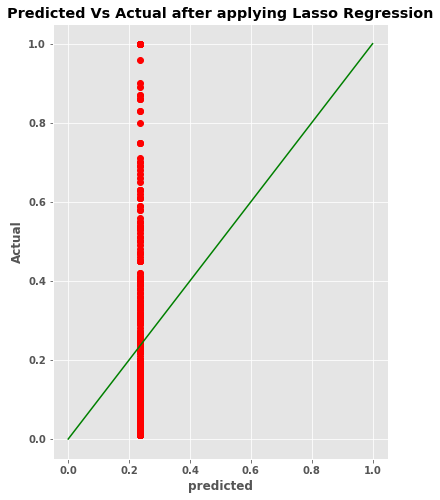

In [78]:
pl.figure(figsize = (6, 8))
pl.plot(yHat, vs_targetTest, 'ro')
pl.plot([0,1.0],[0,1.0], 'g-')
pl.xlabel('predicted')
pl.ylabel('Actual')
pl.title('Predicted Vs Actual after applying Lasso Regression')
pl.show()

<p>As shown above in the chat, Lasso performs poorly than Ridge regression.</p>

<p><strong>e.</strong> Next, perform regression using Stochastic Gradient Descent for regression. For this part, you should use the SGDRegessor module from sklearn.linear_model. Again, start by a creating randomized 80%-20% train-test split. SGDRegessor requires that features be standardized (with 0 mean and scaled by standard deviation). Prior to fiting the model, perform the scaling using StandardScaler from sklearn.preprocessing. For this problem, perform a grid search (using GridSearchCV from sklearn.grid_search) Your grid search should compare combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values, say 10). Using the best parameters, apply the model to the set-aside test data. Finally, perform model selection (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter. [Note: "l1_ratio" is The Elastic Net mixing parameter, with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty, l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic Net model to the set-aside test data. Provide a summary of your findings from the above experiments.</p>

##### Since we already created a randomized 80%-20% test split of our data set, that is what we shall be using.

##### SGD is very senstitive to varying-sized feature values. So, first we need to do feature scaling.

In [79]:
from sklearn.preprocessing import StandardScaler

# This is the StandardScaler scaler
scaler = StandardScaler()
scaler.fit(vs_train_communities_with_ones)

# we apply it to training set so that the data is further normalized and standardized
vs_train_communities_s  = scaler.transform(vs_train_communities_with_ones)
# vs_target_train_s = scaler.transform(vs_target_train) Do we have to normalize the target 
vstestCommunities_s = scaler.transform(vs_test_communities_with_ones)

# print(vs_train_communities_s)

# vs_train_communities_s.shape # (1595, 98)

In [80]:
# you call it just like the previous models. 
# we can tell it to either use L1 or L2 norm depending on what we are trying to minimise.
sgdRegModel = SGDRegressor(penalty='l2', alpha=0.25, max_iter=250) 

# Compute RMSE on training data
sgdRegModel.fit(vs_train_communities_s,vs_target_train)                   # train the model on the training sets  
yHat = sgdRegModel.predict(vs_train_communities_s)                        # predict on the training set, which we call yHat
error = abs(yHat - vs_target_train)                                       # you take the absolute value of the difference, wich is your error and that is the term you are going to square
total_error = np.dot(error,error)

# compute the square root of the total error and divide that by the length of p (number of points) and gives you the average RMSE.
rmse_train = np.sqrt(total_error/len(yHat))

# Compute RMSE using 10-fold x-validation

kf = KFold(n_splits=10)
kf.get_n_splits(vs_train_communities_with_ones)

KFold(n_splits=n,random_state=None, shuffle=False)
    
xval_err = 0

for train,test in kf.split(vs_train_communities_with_ones):
    scaler = StandardScaler()
    scaler.fit(vs_train_communities_with_ones[train])  # Don't cheat - fit only on training data
    
    vs_train_communities_s = scaler.transform(vs_train_communities_with_ones[train])
    
    # apply same transformation to test data
    vs_test_communities_s = scaler.transform(vs_train_communities_with_ones[test])    
    
    sgdRegModel.fit(vs_train_communities_s, vs_target_train[train])  # train the model on the training sets
    
    yHat = sgdRegModel.predict(vs_test_communities_s) # predict on the training set, which we call yHat
    
    error = yHat - vs_target_train[test] # you take the absolute value of the difference, wich is your error and that is the term you are going to square
    xval_err += np.dot(error, error)
rmse_10cv = np.sqrt(xval_err/len(vs_train_communities_with_ones))

method_name = 'Stochastic Gradient Descent Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Stochastic Gradient Descent Regression
RMSE on training: 0.1351
RMSE on 10-fold CV: 0.1376


#### Performing a grid search (using GridSearchCV from sklearn.grid_search) Our grid search is going to combinations of two penalty parameters ('l2', 'l1') and different values of alpha (alpha could vary from 0.0001 which is the default to relatively large values, say 10).

In [81]:
alphaValues = np.linspace(0.0001, 10, 50)

In [82]:
import math
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor

alphaValues = np.linspace(0.0001, 10, 50)
parameters = {'penalty': ['l2', 'l1'], 'alpha': alphaValues}

# gsComparison = GridSearchCV(SGDRegressor(), param_grid = {'penalty': ['l2', 'l1'], 
#                                                               'alpha': np.linspace(0.0001, 10, 50)
#                                                          }
#                            )



gsComparison = GridSearchCV(SGDRegressor(), param_grid = parameters, verbose = 1)


In [83]:
%time
gsComparison.fit(vs_train_communities_with_ones, vs_target_train)

Wall time: 0 ns
Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': array([ 0.  ,  0.2 ,  0.41,  0.61,  0.82,  1.02,  1.22,  1.43,  1.63,  1.84,
        2.04,  2.24,  2.45,  2.65,  2.86,  3.06,  3.27,  3.47,  3.67,  3.88,
        4.08,  4.29,  4.49,  4.69,  4.9 ,  5.1 ,  5.31,  5.51,  5.71,  5.92,
        6.12,  6.33,  6.53,  6.73,  6.94,  7.14,  7.35,  7.55,  7.76,  7.96,
        8.16,  8.37,  8.57,  8.78,  8.98,  9.18,  9.39,  9.59,  9.8 , 10.  ]),
                         'penalty': ['l2', 'l1']},
             verbose=1)

In [84]:
print('The best parameter after fitting 5 folds for each of 100 points is %s' %gsComparison.best_params_)
print('The best score after fitting 5 folds for each of 100 points is %.4f' %gsComparison.best_score_)

The best parameter after fitting 5 folds for each of 100 points is {'alpha': 0.0001, 'penalty': 'l2'}
The best score after fitting 5 folds for each of 100 points is 0.6433


### Applying the model to the test aside test data. 

In [85]:
%time
sgdRegModel = SGDRegressor(penalty='l2', alpha=0.0001, max_iter=500)

# we fit the model on training data
sgdRegModel.fit(vs_train_communities_with_ones, vs_target_train)

yHat = sgdRegModel.predict(vstestCommunities_s)

Wall time: 0 ns


In [86]:
score = sgdRegModel.score(vs_train_communities_with_ones, vs_target_train)
print('The R-squared is %.4f' %score)

The R-squared is 0.6571


## QA 

In [87]:
from sklearn.model_selection import KFold

def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing scores with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):
        print (param_name, ' = ', param_value)
        
        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        #cv = KFold(len(X), K, shuffle=True, random_state=0)
        
        cv = KFold(n_splits=K)
        cv.get_n_splits(X) 
        cv = KFold(n_splits=K,random_state=None, shuffle=False)
        
        j = 0
        # iterate over the K folds
        for train, test in cv.split(X):
            # fit the regression model in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit(X[train], y[train])
            k_train_scores[j] = measurePerformance(X[train], y[train], clf)
            k_test_scores[j] = measurePerformance(X[test], y[test], clf)
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

In [88]:
alphaV = np.linspace(.01, 20, 50) 
alphaV = np.array([float(e) for e in alphaV])
alphaV

array([ 0.01,  0.42,  0.83,  1.23,  1.64,  2.05,  2.46,  2.87,  3.27,  3.68,
        4.09,  4.5 ,  4.91,  5.31,  5.72,  6.13,  6.54,  6.95,  7.35,  7.76,
        8.17,  8.58,  8.99,  9.39,  9.8 , 10.21, 10.62, 11.02, 11.43, 11.84,
       12.25, 12.66, 13.06, 13.47, 13.88, 14.29, 14.7 , 15.1 , 15.51, 15.92,
       16.33, 16.74, 17.14, 17.55, 17.96, 18.37, 18.78, 19.18, 19.59, 20.  ])

In [89]:
# train_scores, test_scores = calc_params(vs_train_communities_with_ones, vs_target_train, ridge, alphaV, 'alpha', 5)

#### Performing model selection (similar to part d, above) to find the best "l1_ratio" parameter using SGDRegressor with  the "elasticnet" penalty parameter.

In [90]:
from sklearn.preprocessing import StandardScaler

def evaluateBestRatio(num, l1Ratio):
    # This is the StandardScaler scaler
    scaler = StandardScaler()
    scaler.fit(vs_train_communities_with_ones)

    # we apply it to training set so that the data is further normalized and standardized
    vs_train_communities_s  = scaler.transform(vs_train_communities_with_ones)
    # vs_target_train_s = scaler.transform(vs_target_train) Do we have to normalize the target 
    vstestCommunities_s = scaler.transform(vs_test_communities_with_ones)

    # print(vs_train_communities_s)

    # vs_train_communities_s.shape # (1595, 98)

    # you call it just like the previous models. 
    # we can tell it to either use L1 or L2 norm depending on what we are trying to minimise.
    sgdRegModel = SGDRegressor(penalty='elasticnet', alpha=num, l1_ratio = l1Ratio, max_iter=300) 

    # Compute RMSE on training data
    sgdRegModel.fit(vs_train_communities_s,vs_target_train)                   # train the model on the training sets  
    yHat = sgdRegModel.predict(vs_train_communities_s)                        # predict on the training set, which we call yHat
    error = abs(yHat - vs_target_train)                                       # you take the absolute value of the difference, wich is your error and that is the term you are going to square
    total_error = np.dot(error,error)

    # compute the square root of the total error and divide that by the length of p (number of points) and gives you the average RMSE.
    rmse_train = np.sqrt(total_error/len(yHat))

    # Compute RMSE using 10-fold x-validation

    kf = KFold(n_splits=10)
    kf.get_n_splits(vs_train_communities_with_ones)

    KFold(n_splits=n,random_state=None, shuffle=False)

    xval_err = 0

    for train,test in kf.split(vs_train_communities_with_ones):
        scaler = StandardScaler()
        scaler.fit(vs_train_communities_with_ones[train])  # Don't cheat - fit only on training data

        vs_train_communities_s = scaler.transform(vs_train_communities_with_ones[train])

        # apply same transformation to test data
        vs_test_communities_s = scaler.transform(vs_train_communities_with_ones[test])    

        sgdRegModel.fit(vs_train_communities_s, vs_target_train[train])  # train the model on the training sets

        yHat = sgdRegModel.predict(vs_test_communities_s) # predict on the training set, which we call yHat

        error = yHat - vs_target_train[test] # you take the absolute value of the difference, wich is your error and that is the term you are going to square
        xval_err += np.dot(error, error)
    rmse_10cv = np.sqrt(xval_err/len(vs_train_communities_with_ones))

    method_name = 'Stochastic Gradient Descent Regression'
    print('Method: %s' %method_name)
    print('RMSE on training: %.4f' %rmse_train)
    print('RMSE on 10-fold CV: %.4f' %rmse_10cv)
    
#     return sgdRegModel

In [91]:
# Evaluation of the best l1_ratio = 0
evaluateBestRatio(0.0001, 0)

Method: Stochastic Gradient Descent Regression
RMSE on training: 0.1324
RMSE on 10-fold CV: 0.1367


In [92]:
# Evaluation of the best l1_ratio = 0.5
evaluateBestRatio(0.0001, 0)

Method: Stochastic Gradient Descent Regression
RMSE on training: 0.1295
RMSE on 10-fold CV: 0.1378


In [93]:
# Evaluation of the best l1_ratio = 1
evaluateBestRatio(0.0001, 0)

Method: Stochastic Gradient Descent Regression
RMSE on training: 0.1303
RMSE on 10-fold CV: 0.1361


### Applying the Elastic Net model to the set-aside test data

In [100]:
from sklearn.linear_model import ElasticNet
scaler = StandardScaler()
scaler.fit(vs_train_communities_with_ones)

# we apply it to training set so that the data is further normalized and standardized
vs_train_communities_s  = scaler.transform(vs_train_communities_with_ones)

vs_test_communities_S = scaler.transform(vs_test_communities_with_ones)

elastic_net_m = ElasticNet(alpha = 0.001, l1_ratio = 1, max_iter = 500)
elastic_net_m.fit(vs_train_communities_s,vs_target_train) 

ElasticNet(alpha=0.001, l1_ratio=1, max_iter=500)

In [101]:
# measuring the performance of a model on the testing set
model_MAE, RSquared =  measure_performance(vs_test_communities_S, vs_targetTest, elastic_net_m)
print('The Mean Absolute Error for the testing set is: %.4f' %model_MAE)
print('The coefficient of determination on testing is: %.4f' %RSquared)

The Mean Absolute Error for the testing set is: 0.1005
The coefficient of determination on testing is: 0.6382


<p>The Mean Absolute Error and the coefficient of determination is the same in both Ridge and Elastic Net model regression.</p>

In [96]:
vs_target_train.shape

(1595,)

In [97]:
vs_test_communities_S.shape

(1595, 98)

In [98]:
vs_targetTest.shape

(399,)

In [99]:
vs_test_communities_with_ones.shape

(399, 98)

In [103]:
from sklearn.metrics import explained_variance_score
#def measure_performance(X, y, modelType):
y_pred = elastic_net_m.predict(vs_test_communities_S)   
ev_score = explained_variance_score(vs_targetTest, y_pred)
ev_score 

0.639958072619876

In [108]:
from sklearn.metrics import explained_variance_score
#def measure_performance(X, y, modelType):
y_pred = lasso.predict(vs_test_communities_with_ones)   
ev_score = explained_variance_score(vs_targetTest, y_pred)
ev_score 


# vs_test_communities_with_ones, vs_targetTest, lasso

0.0

In [107]:
from sklearn.metrics import explained_variance_score
#def measure_performance(X, y, modelType):
y_pred = ridge.predict(vs_test_communities_with_ones)   
ev_score = explained_variance_score(vs_targetTest, y_pred)
ev_score 

0.6345459522214221